<a href="https://colab.research.google.com/github/lalutir/Machine-Learning-Portfolio-2/blob/Lars/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
#import zipfile
#import os
#
#zip_file_path = 'Testing.zip'
#extract_path = '/content/'
#
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#  zip_ref.extractall(extract_path)
#
#os.listdir(extract_path)

In [3]:
import sys
sys.path.append('/content/Machine-Learning-Portfolio-2')

# 0. Loading packages

Uncomment cell below if not all necessary packages are installed

In [4]:
# Install necessary packages
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install seaborn
# %pip install scikit-learn
# %pip install missingno
# %pip install imblearn
# %pip install xgboost
# %pip install statsmodels

In [5]:
import warnings
warnings.filterwarnings('ignore')

import functions as fc

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. Loading data

In [6]:
train_data = pd.read_csv('Datasets/train.csv')
test_data = pd.read_csv('Datasets/test.csv')

test_data_pred_col = list(test_data['date_hour'])

# 2. Inspecting data

## 2.1 Showing datasets

In [7]:
train_data.head()

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


In [9]:
train_data.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


The datasets contains no missing data.

The columns in the dataset are predominantly of data types `int` or `float`, except for the `date_hour` column, which is of type `object`. This column will need to be converted to the `datetime` format for further analysis.

## 2.2 Inspecting individual columns

In [10]:
cols = ['holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

dv_train = fc.DataVisualizer(train_data)

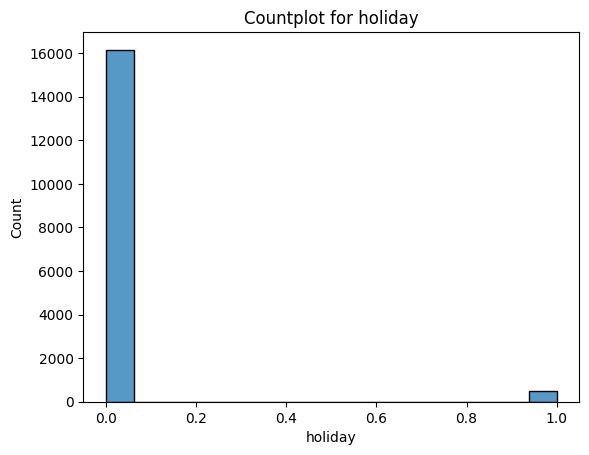

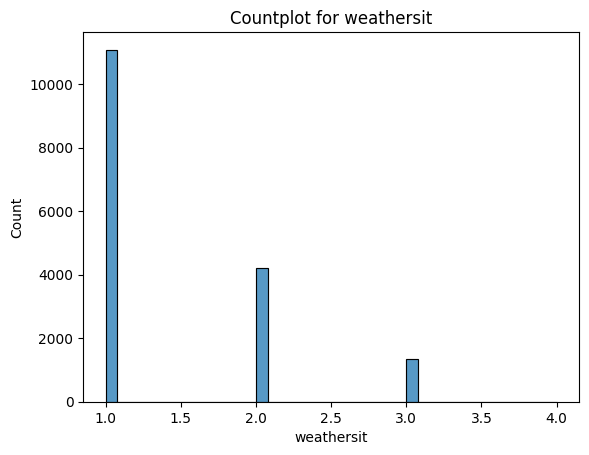

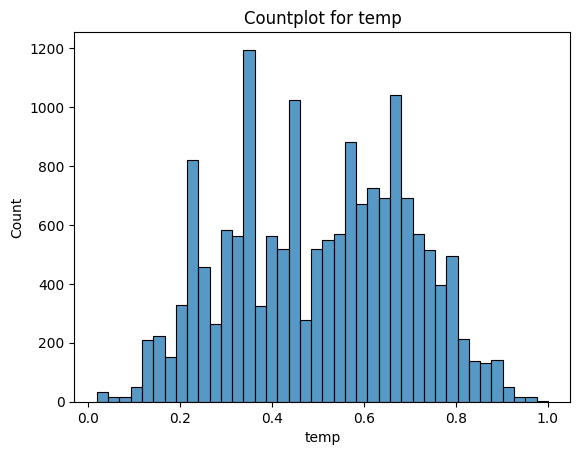

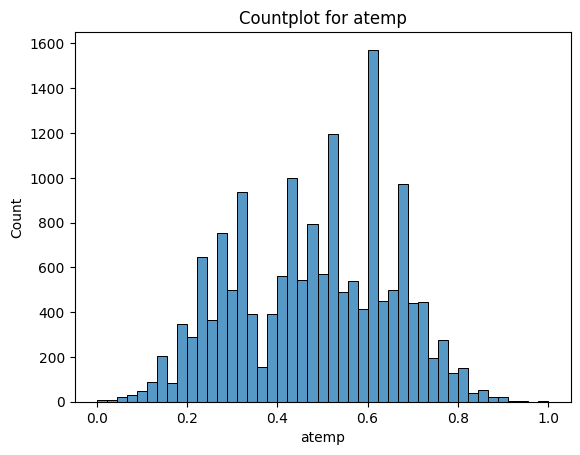

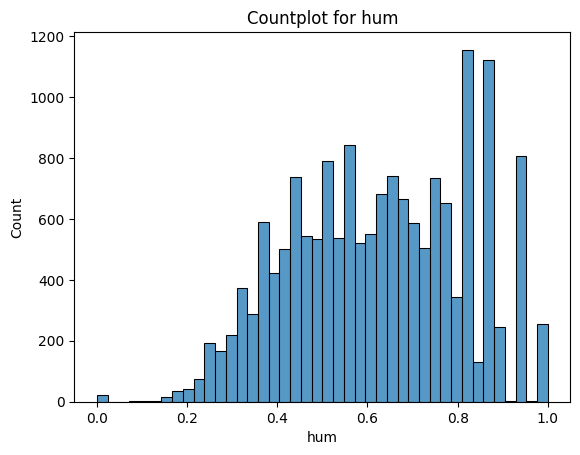

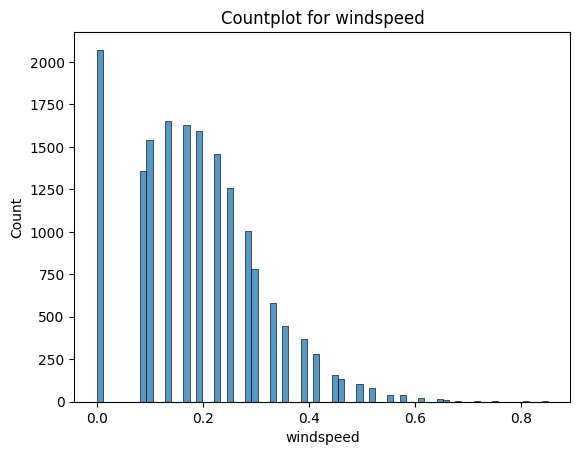

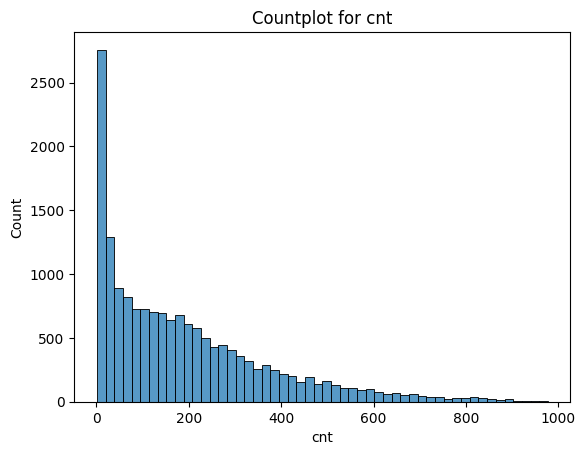

In [11]:
dv_train.plot_distribution(cols, 'train_data')

1. **Countplot for `holiday`:**
    - **Majority of entries are non-holidays**: The count for `0` (non-holidays) is significantly higher than `1` (holidays), indicating that most of the data represents regular working or non-holiday days.
2. **Countplot for `weathersit`:**
    - **Category 1 dominates**: Most observations fall into category `1`, representing favorable or clear weather.
    - **Category 2 and 3 are less common**: These represent moderate or less favorable weather conditions.
    - **Category 4 is absent**: These imply extreme weather conditions are not present in the dataset.
3. **Countplot for `temp`:**
    - This column is normally distributed.
4. **Countplot for `atemp`:**
    - This column is normally distributed.
5. **Countplot for `hum`:**
    - This column is left skewed.
6. **Countplot for `windspeed`:**
    - This column is right skewed.
7. **Countplot for `cnt`:**
    - Most of the amounts for cnt are nearer to zero, indicating that higher amounts for `cnt` are preserved for specific occassions.

## 2.3 Relationships between variables

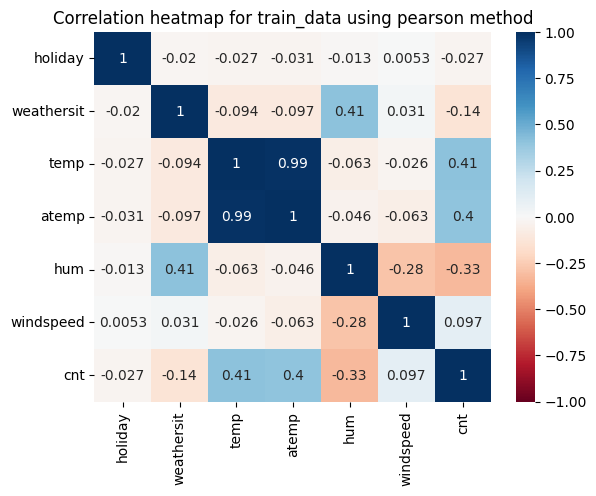

In [12]:
dv_train.plot_correlation('train_data', method='pearson')

The target variable `cnt` exhibits the following correlations with the other features in the dataset:

1. **`temp` (Temperature)**:
   - Correlation: **0.41** (moderate positive)
   - Interpretation: As temperature increases, the count of rentals tends to increase. This suggests that warmer weather is favorable for usage.

2. **`atemp` (Feels-like Temperature)**:
   - Correlation: **0.4** (moderate positive)
   - Interpretation: Similar to `temp`, higher feels-like temperatures are associated with more rentals. Since `temp` and `atemp` are highly correlated with each other, their impact on `cnt` is quite similar.

3. **`hum` (Humidity)**:
   - Correlation: **-0.33** (moderate negative)
   - Interpretation: Higher humidity levels are associated with a decrease in rentals. This indicates that humid weather may discourage people from renting.

4. **`windspeed`**:
   - Correlation: **0.097** (weak positive)
   - Interpretation: Windspeed shows a very weak positive correlation with rentals. This suggests that windspeed has a minimal linear relationship with the count of rentals.

5. **`weathersit` (Weather Situation)**:
   - Correlation: **-0.14** (weak negative)
   - Interpretation: Since this column is a column consisting of four classes, a pearson correlation coefficient is not the best way to figure out relations.

6. **`holiday`**:
   - Correlation: **-0.027** (very weak negative)
   - Interpretation: The correlation between holidays and rentals is negligible, indicating that the number of rentals is not significantly affected by whether it is a holiday. Although, here again it is a column consisting of two classes, therefore, a pearson correlation coefficient is not the best way to find out relations.

**Summary:**
- The most significant predictors of `cnt` are `temp` (0.41), `atemp` (0.4), and `hum` (-0.33), as these exhibit moderate correlations.
   - Since `temp` and `atemp` have a high correlation towards eachothter (0.99), one of them can be rendered negligible.
- Features such as `windspeed`, `weathersit`, and `holiday` show weak or negligible correlations, indicating they may have limited linear influence on the target variable.

## 2.4 Inspecting trends, and seasonal components

In [13]:
train_dc = fc.TimeSeriesDecomposer(train_data['cnt'], period=24)

In [14]:
trend, seasonal, residual = train_dc.decompose()

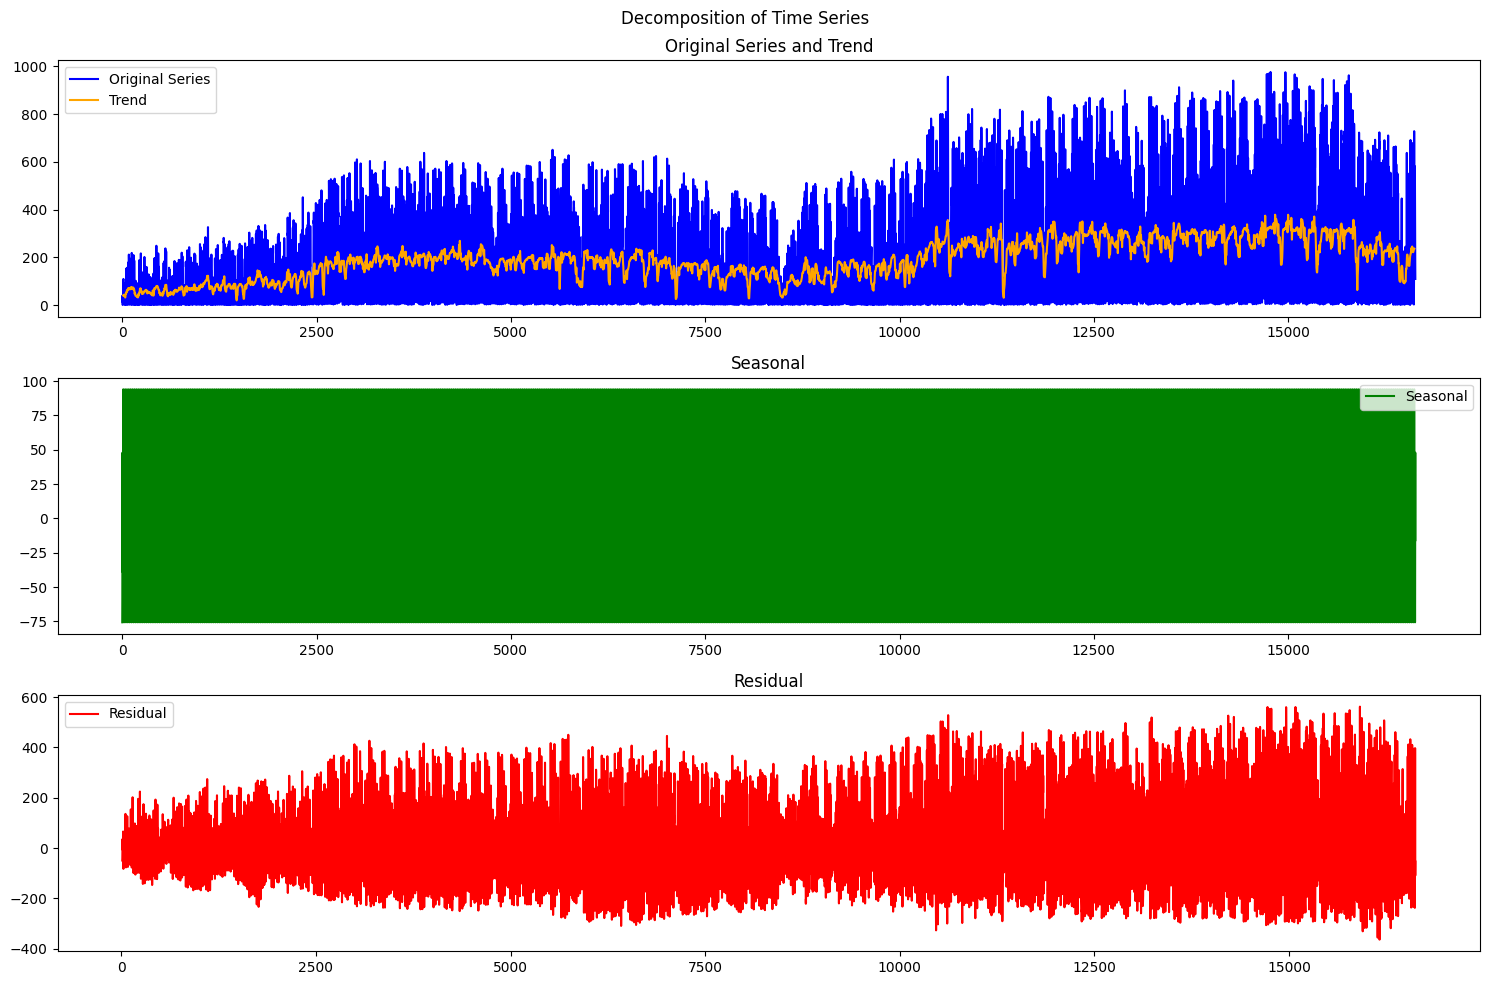

In [15]:
train_dc.plot_decomposition(trend, seasonal, residual)

The plot above does not clearly reveal a seasonally repeating pattern. This is likely due to the extensive amount of data, as it encompasses hourly observations over a two-year period. To facilitate the identification of seasonal patterns, a new decomposition will be performed on a subset comprising one-thirtysecond of the dataset.


In [16]:
train_dc_1 = fc.TimeSeriesDecomposer(train_data.loc[:len(train_data)/32, 'cnt'], period=24)

In [17]:
trend, seasonal, residual = train_dc_1.decompose()

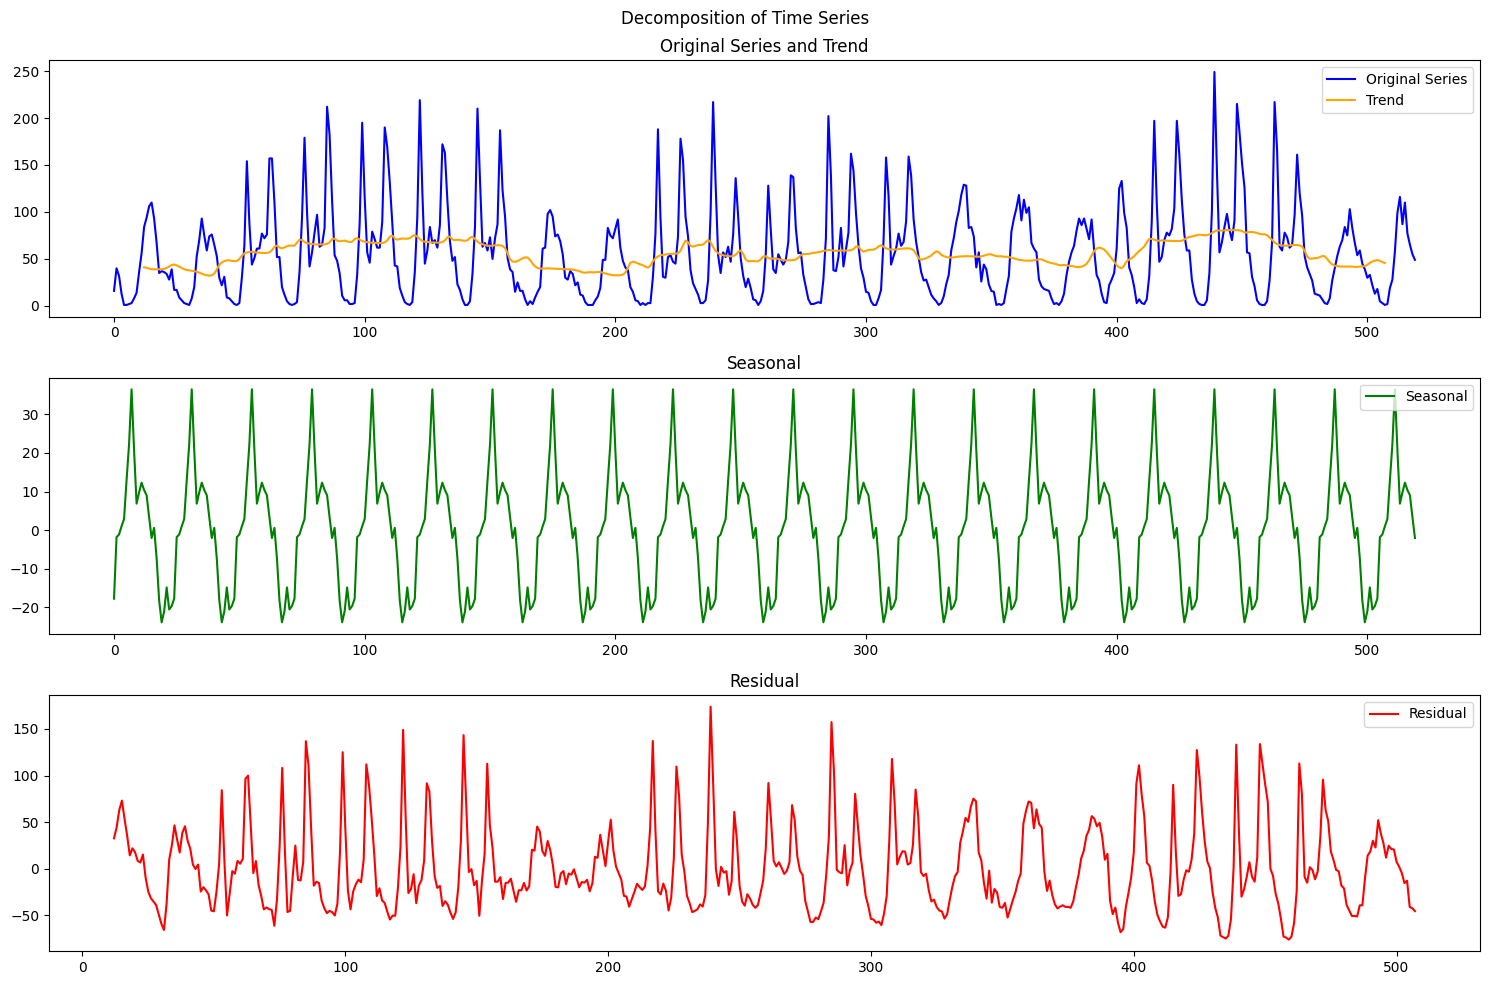

In [18]:
train_dc_1.plot_decomposition(trend, seasonal, residual)

The plot above reveals a distinct seasonal pattern, suggesting a potential temporal influence on the `cnt` variable. However, there is no clear trend showing, indicating that the data might already be stationary, which will be tested with the Augmented Dicky Fuller test later on.

## 2.5 Inspecting time specific relations

In [19]:
train_data = fc.create_timeseries_features(train_data)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_hour    16637 non-null  datetime64[ns]
 1   holiday      16637 non-null  int64         
 2   weathersit   16637 non-null  int64         
 3   temp         16637 non-null  float64       
 4   atemp        16637 non-null  float64       
 5   hum          16637 non-null  float64       
 6   windspeed    16637 non-null  float64       
 7   cnt          16637 non-null  int64         
 8   year         16637 non-null  int64         
 9   month        16637 non-null  int64         
 10  week         16637 non-null  int64         
 11  day          16637 non-null  int64         
 12  hour         16637 non-null  int64         
 13  day_of_week  16637 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.8 MB


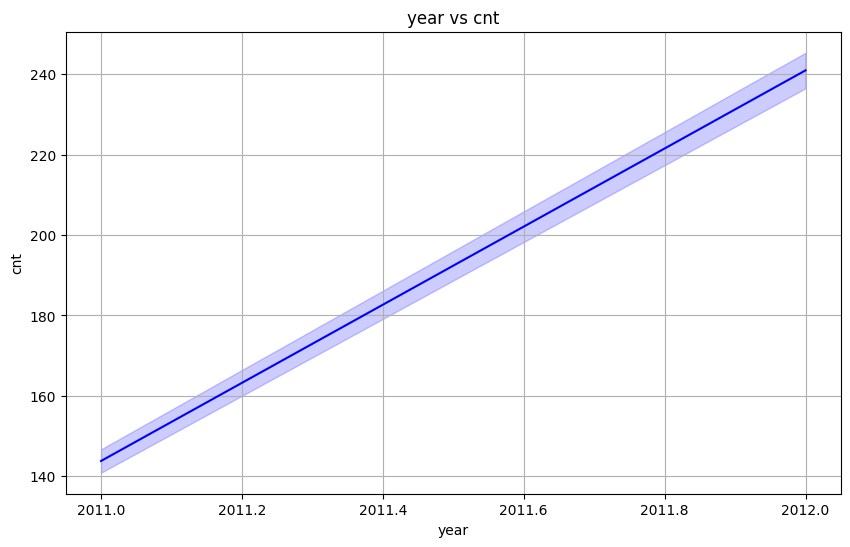

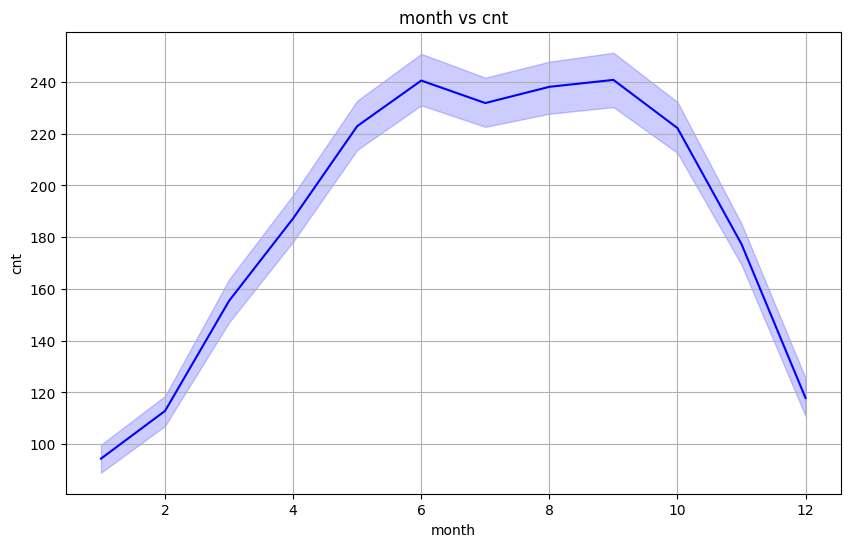

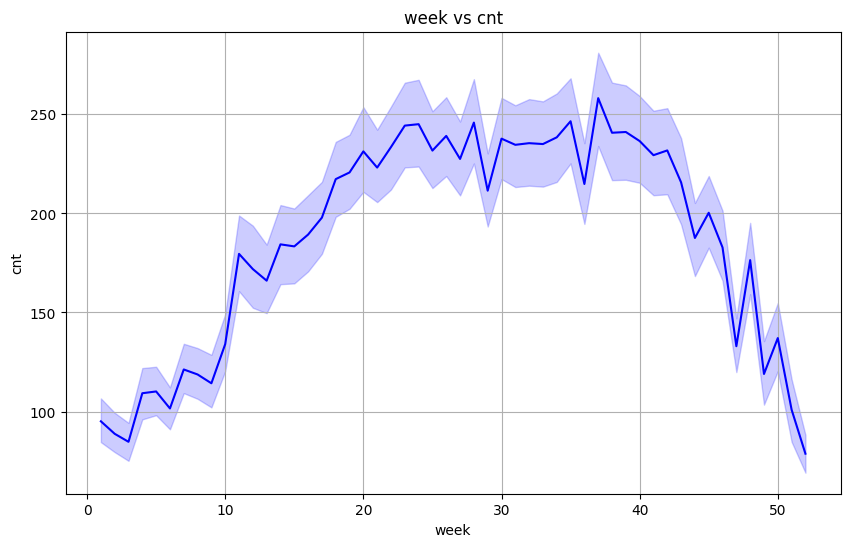

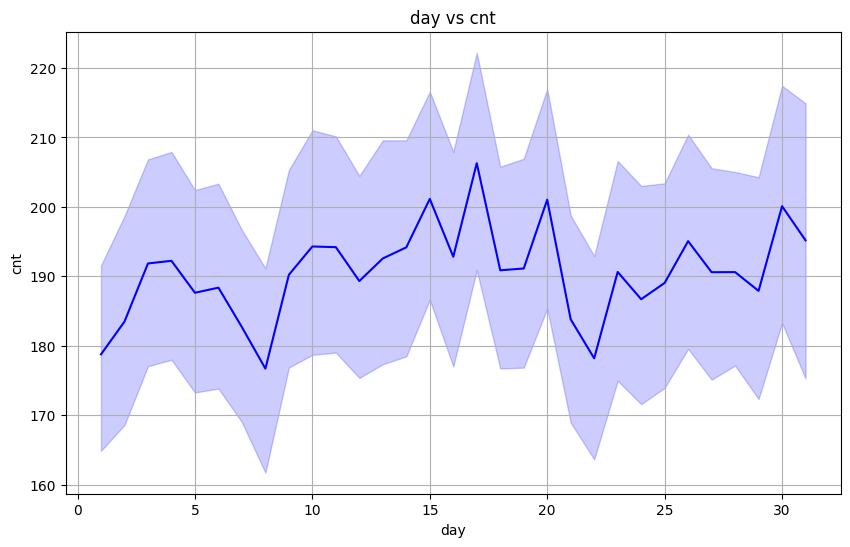

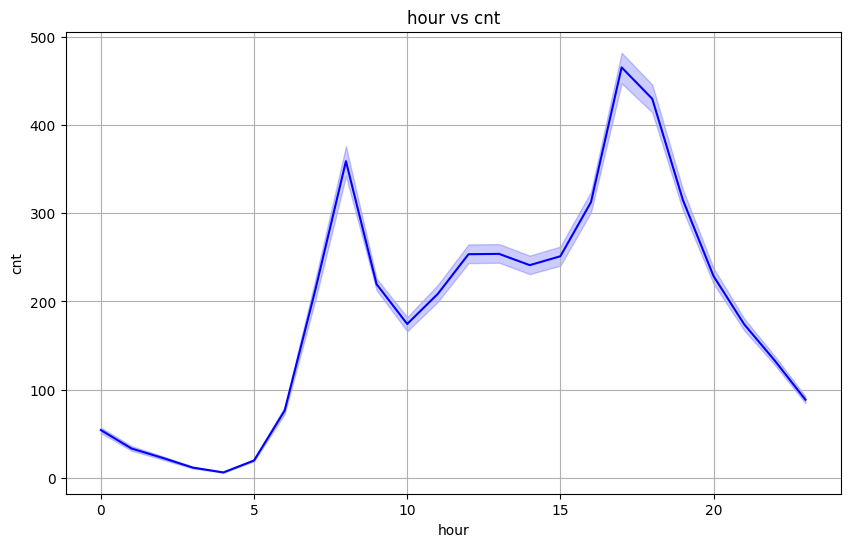

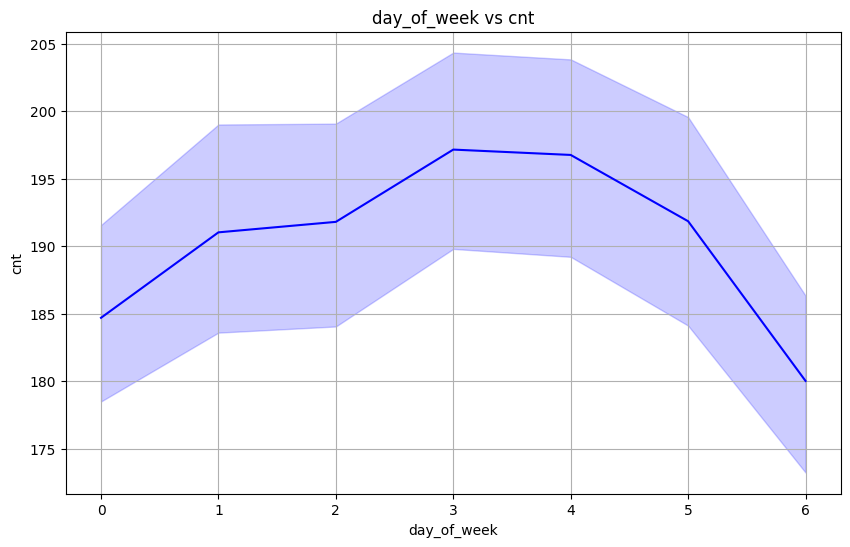

In [21]:
cols = ['year', 'month', 'week', 'day', 'hour', 'day_of_week']

for col in cols:
    dv_train.lineplot(x=col, y='cnt', title=f'{col} vs cnt', path=f'Figures/{col}_vs_cnt.png')

The analysis of the above plots reveals the following insights:  
- Over the two-year period, the average value of `cnt` has shown an upward trend. Since there is no real added value in this column since we are working over just two years, this column will be dropped  
- The monthly and weekly graphs demonstrate a distinct peak in `cnt` during the summer months. Since in both of the columns the same trends can be observed, the month column will be dropped.
- The day-of-the-month graph does not exhibit a clear correlation. Therefore, this column will be dropped.
- The hour-of-the-day graph shows pronounced peaks during the morning and evening hours.  
- The day-of-the-week graph indicates noticeable peaks on the fourth and fifth days of the week.

## 2.6 Conclusion

The exploratory data analysis (EDA) highlights key insights that guide the refinement of the dataset for further analysis:

1. **Data Quality**:  
   - The dataset is complete, with no missing values.  
   - The `date_hour` column will be converted to a `datetime` format to enable effective temporal analysis.

2. **Feature Analysis and Justifications for Removal**:  
   - **`holiday`**: The correlation with `cnt` is negligible, and its binary nature limits its predictive value.  
   - **`year`, `month`, `day`**: While the data spans two years, seasonal trends can be captured more effectively through decomposition or other temporal features. The `month` and `day` columns show overlapping or minimal trends, making them redundant.  
   - **`atemp`**: Strongly correlated with `temp` (correlation: 0.99), making it redundant. Retaining only `temp` avoids multicollinearity.  
   - **`windspeed`**: Exhibits a very weak correlation (0.097) with `cnt` and contributes minimal predictive power.  

3. **Key Insights for Retained Features**:  
   - **`temp`**: Demonstrates a moderate positive correlation with `cnt` and is a significant predictor of rentals.  
   - **`hum`**: Shows a moderate negative correlation with `cnt`, indicating weather-related impacts on rental activity.  
   - **Temporal Trends**: Hourly and weekly patterns highlight critical peaks, which can be leveraged to model time-based fluctuations effectively.

4. **Trend Analysis**:  
   - While there is an upward trend in `cnt` over time, this is likely due to growth over the dataset's two-year span. These long-term trends are better addressed with aggregate or time-series modeling rather than the inclusion of the `year` column.

### Updated Dataset for Modeling
Based on these findings, the following columns will be dropped:  
**`holiday`, `year`, `month`, `day`, `atemp`, and `windspeed`**.

## 2.7 Application of conclusion

In [22]:
train_data = train_data.drop(['holiday', 'year', 'month', 'day', 'atemp', 'windspeed'], axis=1)

## 2.8 Changing `test_data`

In [23]:
test_data = fc.create_timeseries_features(test_data)

In [24]:
test_data = test_data.drop(['holiday', 'year', 'month', 'day', 'atemp', 'windspeed'], axis=1)

# 3. Feature engineering

## 3.1 Stationarity

To assess whether the dataset exhibits stationarity, we will perform the Augmented Dickey-Fuller (ADF) test. This statistical test evaluates the null hypothesis ($H_0$) that the data contains a unit root, indicating non-stationarity. Rejection of the null hypothesis suggests that the data is stationary.

**Hypothesis:**

- $H_0$: The data contains a unit root and is non-stationary.
- $H_1$: The data does not contain a unit root and is stationary.

**Results:**

The outcome of the ADF test includes:
- The test statistic, which is compared against critical values at various significance levels (e.g., 1%, 5%, 10%).
- The p-value, indicating the probability of observing the test statistic under the null hypothesis.

Based on these results, we will determine if stationarity can be assumed for the dataset or if additional transformations (e.g., differencing) are necessary to achieve stationarity.


In [25]:
stat_tests = fc.StatisticalTests(train_data)

In [26]:
stat_tests.stationary_test('cnt')

ADF Statistic: -6.625164793721716
p-value: 5.901288668679553e-09
Critical Values: {'1%': -3.430744160906401, '5%': -2.8617142032973706, '10%': -2.5668627239973634}

Reject the null hypothesis, the data is stationary


## 3.2 Fourier analysis

Peaks found at: [  2 692 694]
With amplitude: [67.34822877 84.48638012 84.06332976]


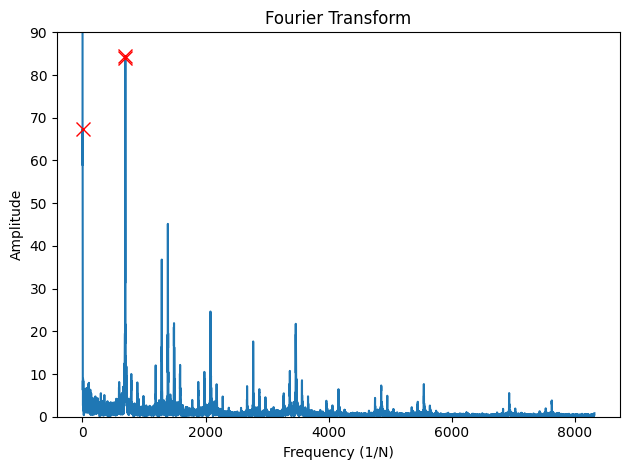

In [27]:
stat_tests.fourier_analysis('cnt')

The signal under analysis consists of multiple key periodic components distributed across different frequencies, with the most prominent peaks observed at approximately 692 hour, 694 hours, and 2 hours. By applying a filtering process to remove peaks with amplitudes below the 50 threshold, the analysis effectively isolates the dominant frequencies. These frequencies are now primed for subsequent stages of signal processing, feature extraction, or machine learning modeling.

The results of this analysis indicate that the signal exhibits a complex structure characterized by periodic elements at various frequencies. Future work can now concentrate on these primary frequencies for deeper exploration or predictive modeling.


## 3.3 Autocorrelation

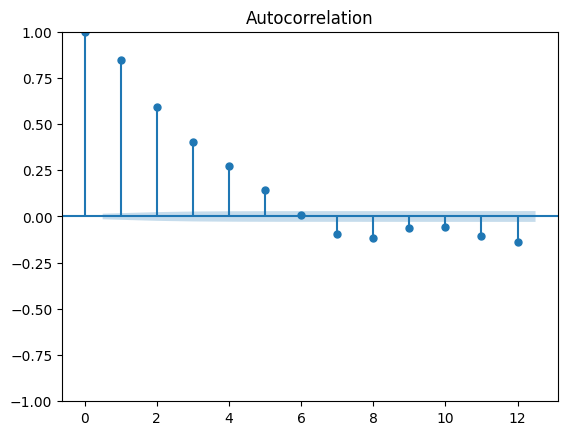

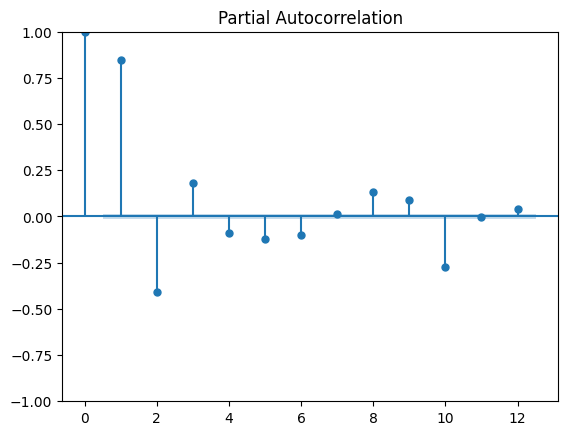

In [28]:
plot_acf(train_data['cnt'], lags=12, ax=plt.gca(), alpha=0.05)
plt.savefig('Figures/ACF.png')
plt.show()

plot_pacf(train_data['cnt'], lags=12, ax=plt.gca(), alpha=0.05)
plt.savefig('Figures/PACF.png')
plt.show()

Based on the combined autocorrelation and partial autocorrelation plots, we observe significant correlations up to **lag 5**. This indicates that past values within this lag range have a meaningful relationship with the current value, which may be important for time series modeling.

## 3.4 Scaling

Scaling is not required in this context, as there are no continuous variables present. However, the time series components and weathersit need to be transformed into dummy variables. This transformation will address categorical aspects and enhance the modeling process by ensuring compatibility with the analysis framework.

In [29]:
scaler = MinMaxScaler()

train_data[['day_of_week', 'hour', 'week', 'weathersit']] = scaler.fit_transform(train_data[['day_of_week', 'hour', 'week', 'weathersit']])
test_data[['day_of_week', 'hour', 'week', 'weathersit']] = scaler.transform(test_data[['day_of_week', 'hour', 'week', 'weathersit']])

## 3.5 Setting date as index

In [30]:
dum_train_data = train_data.set_index('date_hour')
dum_test_data = test_data.set_index('date_hour')

# 4. Modelling

In [31]:
models_dict = {'lr': (LinearRegression(), {}),
               'knn': (KNeighborsRegressor(), {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}),
               'dt': (DecisionTreeRegressor(), {'max_depth': [3, 5], 'min_samples_split': [4, 6], 'min_samples_leaf': [2, 3, 4]}),
               'rf': (RandomForestRegressor(), {'n_estimators': [50, 100], 'max_depth': [3, 5], 'min_samples_split': [4, 6], 'min_samples_leaf': [2, 3, 4]}),
               'xgb': (XGBRegressor(), {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1, 0.3], 'subsample': [0.5, 0.7, 1], 'colsample_bytree': [0.5, 0.7, 1]})}

In [32]:
lr = LinearRegression()

gs = fc.GridSearch(dum_train_data, dum_test_data, target='cnt', model=lr, param_grid={'fit_intercept': [True, False]}, n_splits=5)
gs.fit()
gs.predict(test_data_pred_col)
gs.to_csv(model='lr')

Best parameters: {'fit_intercept': True}, Best score: -208.72944626947987
